# Data Mounting

In [1]:
import os
import pandas as pd
from PIL import Image

# --- 1. Define local base path ---
base_path = r"C:\Users\muham\Downloads\archive (1)\tbx11k-simplified"
image_folder_path = os.path.join(base_path, "images")

# --- 2. Scan image folders ---
image_extensions = ['.jpg', '.jpeg', '.png', '.bmp', '.tiff']
categories = ["health", "sick no tb", "tb"]

image_data = []

for category in categories:
    category_path = os.path.join(image_folder_path, category)
    
    if not os.path.isdir(category_path):
        print(f"⚠️ Folder not found: {category_path}")
        continue

    for file_name in os.listdir(category_path):
        if os.path.splitext(file_name)[1].lower() in image_extensions:
            full_path = os.path.join(category_path, file_name)
            image_data.append({
                "filename": file_name,
                "category": category,
                "path": full_path
            })

print(f"\n✅ Found {len(image_data)} images total across categories:")
for c in categories:
    count = sum(1 for d in image_data if d["category"] == c)
    print(f"- {c}: {count} images")

# --- 3. Load and display the first image as a test ---
if image_data:
    try:
        first_image_info = image_data[0]
        img = Image.open(first_image_info["path"])
        print(f"\n🖼️ Loaded sample image from '{first_image_info['category']}': {first_image_info['filename']} ({img.format}, {img.size})")
        img.show()  # This will open the image in the default image viewer
    except Exception as e:
        print(f"❌ Error loading image: {e}")
else:
    print("❌ No valid images found.")



✅ Found 8400 images total across categories:
- health: 3800 images
- sick no tb: 3800 images
- tb: 800 images

🖼️ Loaded sample image from 'health': h0001.png (PNG, (512, 512))


In [2]:
import os
import pandas as pd
from PIL import Image

# --- 1. Define Paths ---
base_path = r"C:\Users\muham\Downloads\archive (1)\tbx11k-simplified"
image_folder_path = os.path.join(base_path, "images")
csv_path = os.path.join(base_path, "data.csv")

print(f"Base path: {base_path}")
print(f"Image folder path: {image_folder_path}")
print(f"CSV path: {csv_path}\n")

# --- 2. Load data.csv ---
df = None # Initialize df to None
if os.path.isfile(csv_path):
    try:
        df = pd.read_csv(csv_path)
        print(f"📄 Loaded data.csv with {len(df)} rows and {len(df.columns)} columns.")
        print("First 5 rows of data.csv:")
        print(df.head())
        # print("\nColumn info from data.csv:")
        # df.info() # Uncomment if you want detailed column types and non-null counts
        
        # Analyze 'image_type' which is used as the label in later cells
        if 'image_type' in df.columns:
            print("\nCounts per 'image_type' in data.csv:")
            print(df['image_type'].value_counts())
        else:
            print("\n⚠️ 'image_type' column not found in data.csv, which might be an issue for later processing.")

    except Exception as e:
        print(f"❌ Failed to load data.csv: {e}")
else:
    print(f"❌ data.csv not found at: {csv_path}")

# --- 3. Scan Image Folders (for verification and to build image_data list) ---
image_extensions = ['.jpg', '.jpeg', '.png', '.bmp', '.tiff']
# These categories correspond to the subfolder names under 'images'
physical_scan_categories = ["health", "sick no tb", "tb"] 
scanned_image_data = [] # To store info about physically found images

print(f"\nScanning physical image folders in: {image_folder_path}...")
for category_folder_name in physical_scan_categories:
    category_path = os.path.join(image_folder_path, category_folder_name)
    
    if not os.path.isdir(category_path):
        print(f"⚠️ Physical folder for category '{category_folder_name}' not found: {category_path}")
        continue

    count_in_category = 0
    for file_name_in_folder in os.listdir(category_path):
        if os.path.splitext(file_name_in_folder)[1].lower() in image_extensions:
            full_path = os.path.join(category_path, file_name_in_folder)
            scanned_image_data.append({
                "filename": file_name_in_folder,
                "category_folder": category_folder_name, 
                "path": full_path
            })
            count_in_category += 1
    print(f"- Found {count_in_category} images in folder '{category_folder_name}'")

total_scanned_images = len(scanned_image_data)
print(f"\n✅ Found {total_scanned_images} images total from physical scan.")

# --- 4. Compare CSV entries with physically scanned files (Optional but good for sanity check) ---
if df is not None and 'fname' in df.columns:
    csv_filenames_set = set(df['fname'].unique())
    scanned_filenames_set = set(item['filename'] for item in scanned_image_data)

    print(f"\nComparison between data.csv and scanned image files:")
    print(f"  Unique filenames in CSV: {len(csv_filenames_set)}")
    print(f"  Unique filenames in scan: {len(scanned_filenames_set)}")
    
    in_csv_not_scanned = csv_filenames_set - scanned_filenames_set
    in_scan_not_csv = scanned_filenames_set - csv_filenames_set
    
    print(f"  Filenames in CSV but NOT found in scan ({len(physical_scan_categories)} specific folders): {len(in_csv_not_scanned)}")
    if len(in_csv_not_scanned) > 0 and len(in_csv_not_scanned) < 20 : # Print a few if the list is small
        print(f"    Examples: {list(in_csv_not_scanned)[:5]}")
    
    print(f"  Filenames in scan but NOT in CSV: {len(in_scan_not_csv)}")
    if len(in_scan_not_csv) > 0 and len(in_scan_not_csv) < 20:
        print(f"    Examples: {list(in_scan_not_csv)[:5]}")
        
    common_files = len(csv_filenames_set.intersection(scanned_filenames_set))
    print(f"  Common filenames (present in both CSV and scan): {common_files}")
    if total_scanned_images != common_files and len(in_scan_not_csv) > 0:
        print(f"  ⚠️ Note: {len(in_scan_not_csv)} scanned images are not listed in the CSV's 'fname' column.")
    if len(df) != common_files and len(in_csv_not_scanned) > 0:
         print(f"  ⚠️ Note: {len(in_csv_not_scanned)} CSV entries do not have corresponding physical files in the scanned folders.")
         print(f"     This could be because they belong to a 'val' set stored elsewhere, or are missing.")


# --- 5. Load and Display a Sample Image ---
# Prioritize loading a sample based on the first entry in the CSV if it's available and the file exists.
# This confirms the path construction logic used in later cells.

sample_image_loaded = False
if df is not None and not df.empty and 'fname' in df.columns and 'image_type' in df.columns:
    first_csv_row = df.iloc[0]
    sample_fname_from_csv = first_csv_row['fname']
    sample_image_type_from_csv = first_csv_row['image_type']

    # Determine the correct subfolder based on 'image_type' (consistent with Cell 6 logic)
    folder_for_csv_sample = sample_image_type_from_csv
    if sample_image_type_from_csv == "healthy":
        folder_for_csv_sample = "health"
    elif sample_image_type_from_csv == "sick_but_no_tb":
        folder_for_csv_sample = "sick no tb"
    # 'tb' already matches the folder name

    prospective_path = os.path.join(image_folder_path, folder_for_csv_sample, sample_fname_from_csv)
    
    print(f"\nAttempting to load sample based on first CSV entry: {sample_fname_from_csv} (type: {sample_image_type_from_csv})")
    print(f"  Expected path: {prospective_path}")

    if os.path.isfile(prospective_path):
        try:
            img = Image.open(prospective_path)
            print(f"🖼️ Loaded sample via CSV: '{folder_for_csv_sample}/{sample_fname_from_csv}' ({img.format}, {img.size})")
            # img.show() # Uncomment in an environment that supports image display
            sample_image_loaded = True
        except Exception as e:
            print(f"❌ Error loading image from CSV-derived path: {e}")
    else:
        print(f"❌ Sample image from CSV entry NOT FOUND at: {prospective_path}")

# Fallback: If CSV-based sample loading failed or CSV wasn't available, try the first scanned image.
if not sample_image_loaded and scanned_image_data:
    print("\nAttempting to load first image found during physical scan (as fallback).")
    first_scanned_info = scanned_image_data[0]
    try:
        img = Image.open(first_scanned_info["path"])
        print(f"🖼️ Loaded sample via scan: '{first_scanned_info['category_folder']}/{first_scanned_info['filename']}' ({img.format}, {img.size})")
        # img.show() # Uncomment in an environment that supports image display
        sample_image_loaded = True
    except Exception as e:
        print(f"❌ Error loading image from scan: {e}")

if not sample_image_loaded:
    print("\n❌ No sample image could be loaded either from CSV or physical scan.")

Base path: C:\Users\muham\Downloads\archive (1)\tbx11k-simplified
Image folder path: C:\Users\muham\Downloads\archive (1)\tbx11k-simplified\images
CSV path: C:\Users\muham\Downloads\archive (1)\tbx11k-simplified\data.csv

📄 Loaded data.csv with 8811 rows and 8 columns.
First 5 rows of data.csv:
       fname  image_height  image_width source  bbox target tb_type image_type
0  h0001.png           512          512  train  none  no_tb    none    healthy
1  h0003.png           512          512  train  none  no_tb    none    healthy
2  h0005.png           512          512  train  none  no_tb    none    healthy
3  h0008.png           512          512  train  none  no_tb    none    healthy
4  h0009.png           512          512  train  none  no_tb    none    healthy

Counts per 'image_type' in data.csv:
image_type
healthy           3800
sick_but_no_tb    3800
tb                1211
Name: count, dtype: int64

Scanning physical image folders in: C:\Users\muham\Downloads\archive (1)\tbx11k-simpl

# Data Preparation

## Preparation for YOLOv5

## Preparation for Vision Transformer


In [4]:
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image

# --- 1. Label Mapping ---
label_map = {
    "health": 0,
    "sick no tb": 1,
    "tb": 2
}

# --- 2. Define Transforms for ViT ---
vit_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5]*3, std=[0.5]*3)  # ViT often expects images normalized to [-1, 1]
])

# --- 3. Custom Dataset Class ---
class TBX11KDataset(Dataset):
    def __init__(self, image_entries, label_map, transform=None):
        self.image_entries = image_entries
        self.label_map = label_map
        self.transform = transform

    def __len__(self):
        return len(self.image_entries)

    def __getitem__(self, idx):
        entry = self.image_entries[idx]
        image = Image.open(entry['path']).convert('RGB')  # Ensure 3 channels
        label = self.label_map[entry['category_folder']]
        
        if self.transform:
            image = self.transform(image)
        
        return image, label

# --- 4. Create Dataset and DataLoader ---
dataset = TBX11KDataset(scanned_image_data, label_map, transform=vit_transforms)

# Optional: Shuffle and split into train/val/test
from sklearn.model_selection import train_test_split

train_data, val_data = train_test_split(scanned_image_data, test_size=0.2, stratify=[d['category_folder'] for d in scanned_image_data], random_state=42)
train_dataset = TBX11KDataset(train_data, label_map, transform=vit_transforms)
val_dataset = TBX11KDataset(val_data, label_map, transform=vit_transforms)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=2)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False, num_workers=2)

print(f"\n✅ Datasets prepared:")
print(f"- Training samples: {len(train_dataset)}")
print(f"- Validation samples: {len(val_dataset)}")



✅ Datasets prepared:
- Training samples: 6720
- Validation samples: 1680


In [1]:
import torch
print(torch.cuda.is_available())
print(torch.cuda.get_device_name(0) if torch.cuda.is_available() else "No GPU")


True
NVIDIA GeForce RTX 3050 Laptop GPU


In [5]:
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader, random_split

# --- Data transforms ---
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Required for ViT
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  # Normalize to [-1, 1]
])

# --- Dataset path ---
image_folder_path = r"C:\Users\muham\Downloads\archive (1)\tbx11k-simplified\images"
full_dataset = ImageFolder(root=image_folder_path, transform=transform)

# --- Dataset split ---
train_size = int(0.8 * len(full_dataset))
val_size = len(full_dataset) - train_size
train_dataset, val_dataset = random_split(full_dataset, [train_size, val_size])

# --- DataLoaders with optimal batch size ---
batch_size = 16
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=2, pin_memory=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=2, pin_memory=True)

print(f"✅ Dataset split: {len(train_dataset)} training, {len(val_dataset)} validation samples.")


✅ Dataset split: 6720 training, 1680 validation samples.


🧠 Training on: cuda


c:\Users\muham\AppData\Local\Programs\Python\Python313\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\muham\AppData\Local\Programs\Python\Python313\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ViT_B_16_Weights.IMAGENET1K_V1`. You can also use `weights=ViT_B_16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Downloading: "https://download.pytorch.org/models/vit_b_16-c867db91.pth" to C:\Users\muham/.cache\torch\hub\checkpoints\vit_b_16-c867db91.pth


100%|██████████| 330M/330M [01:48<00:00, 3.20MB/s] 


[Epoch 1/10] Train Loss: 0.1834, Acc: 0.9403 | Val Loss: 0.1120, Acc: 0.9625 | Time: 380.13s
[Epoch 2/10] Train Loss: 0.0757, Acc: 0.9760 | Val Loss: 0.0547, Acc: 0.9839 | Time: 380.31s
[Epoch 3/10] Train Loss: 0.0666, Acc: 0.9783 | Val Loss: 0.0631, Acc: 0.9762 | Time: 380.09s
[Epoch 4/10] Train Loss: 0.0577, Acc: 0.9813 | Val Loss: 0.0617, Acc: 0.9827 | Time: 379.89s
[Epoch 5/10] Train Loss: 0.0433, Acc: 0.9856 | Val Loss: 0.0522, Acc: 0.9839 | Time: 379.62s
[Epoch 6/10] Train Loss: 0.0268, Acc: 0.9920 | Val Loss: 0.0764, Acc: 0.9774 | Time: 380.04s
[Epoch 7/10] Train Loss: 0.0433, Acc: 0.9857 | Val Loss: 0.0630, Acc: 0.9804 | Time: 379.65s
[Epoch 8/10] Train Loss: 0.0438, Acc: 0.9860 | Val Loss: 0.0635, Acc: 0.9804 | Time: 380.05s
[Epoch 9/10] Train Loss: 0.0295, Acc: 0.9902 | Val Loss: 0.0470, Acc: 0.9845 | Time: 380.03s
[Epoch 10/10] Train Loss: 0.0357, Acc: 0.9882 | Val Loss: 0.0597, Acc: 0.9786 | Time: 380.09s
✅ Model weights saved to: C:\Users\muham\Downloads\archive (1)\tbx11k

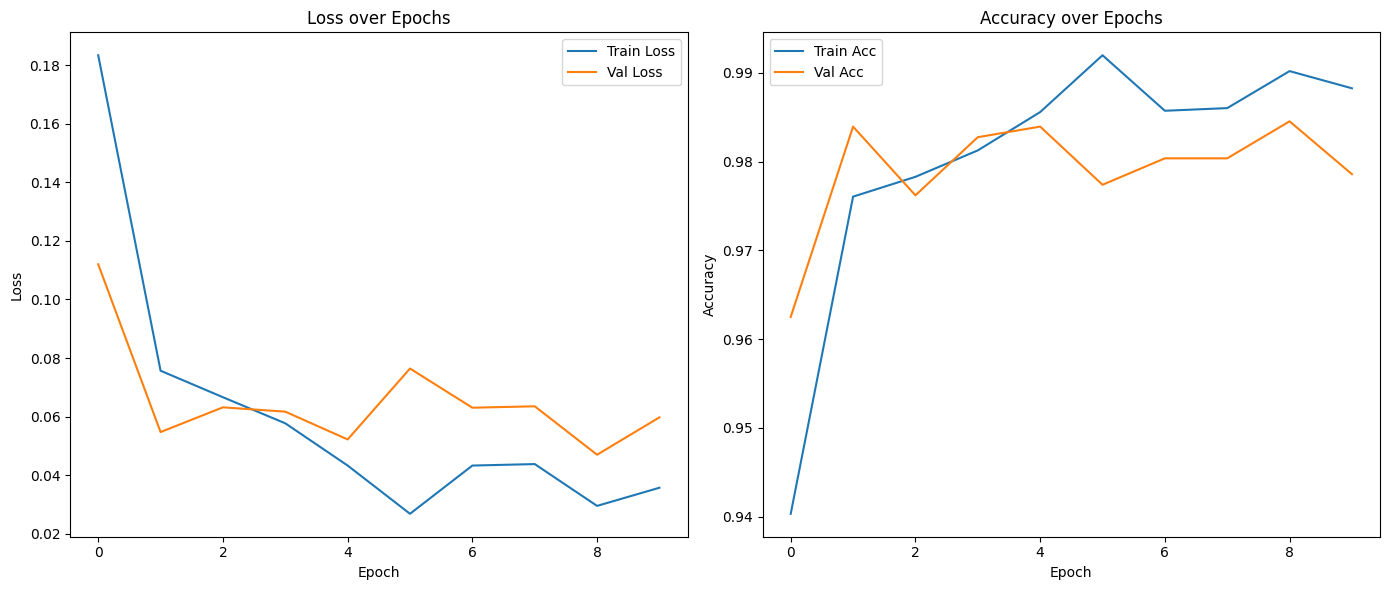

In [6]:
import torch
from torch import nn, optim
from torch.utils.data import DataLoader
from torchvision import models
import time
import matplotlib.pyplot as plt

# --- 1. Use CUDA if available ---
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"🧠 Training on: {device}")

# Optional: enable cuDNN auto-tuner for faster GPU training
torch.backends.cudnn.benchmark = True

# --- 2. Hyperparameters ---
batch_size = 16
epochs = 10
learning_rate = 1e-4

# --- 3. Dataloaders (Assume train_dataset and val_dataset are already defined) ---
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=4, pin_memory=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=4, pin_memory=True)

# --- 4. Load pretrained Vision Transformer ---
model = models.vit_b_16(pretrained=True)
num_classes = 3  # 'health', 'sick no tb', 'tb'
model.heads.head = nn.Linear(model.heads.head.in_features, num_classes)
model = model.to(device)

# --- 5. Loss and optimizer ---
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# --- 6. Training loop ---
def train_model(model, train_loader, val_loader, criterion, optimizer, device, epochs=10):
    train_loss_history = []
    train_acc_history = []
    val_loss_history = []
    val_acc_history = []

    for epoch in range(epochs):
        start_time = time.time()
        model.train()
        running_loss = 0.0
        running_corrects = 0

        for inputs, labels in train_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            _, preds = torch.max(outputs, 1)
            running_loss += loss.item() * inputs.size(0)
            running_corrects += torch.sum(preds == labels.data)

        epoch_loss = running_loss / len(train_loader.dataset)
        epoch_acc = running_corrects.double() / len(train_loader.dataset)

        train_loss_history.append(epoch_loss)
        train_acc_history.append(epoch_acc.item())

        # --- Validation ---
        model.eval()
        val_loss = 0.0
        val_corrects = 0

        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs = inputs.to(device)
                labels = labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)

                _, preds = torch.max(outputs, 1)
                val_loss += loss.item() * inputs.size(0)
                val_corrects += torch.sum(preds == labels.data)

        val_epoch_loss = val_loss / len(val_loader.dataset)
        val_epoch_acc = val_corrects.double() / len(val_loader.dataset)

        val_loss_history.append(val_epoch_loss)
        val_acc_history.append(val_epoch_acc.item())

        # --- Logging ---
        print(f"[Epoch {epoch+1}/{epochs}] "
              f"Train Loss: {epoch_loss:.4f}, Acc: {epoch_acc:.4f} | "
              f"Val Loss: {val_epoch_loss:.4f}, Acc: {val_epoch_acc:.4f} | "
              f"Time: {time.time() - start_time:.2f}s")

    return train_loss_history, train_acc_history, val_loss_history, val_acc_history

# --- 7. Start Training ---
train_losses, train_accs, val_losses, val_accs = train_model(
    model, train_loader, val_loader, criterion, optimizer, device, epochs=epochs
)

# --- 9. Save model weights to specified path ---
save_path = r"C:\Users\muham\Downloads\archive (1)\tbx11k-simplified\vit_model.pth"
torch.save(model.state_dict(), save_path)
print(f"✅ Model weights saved to: {save_path}")


# --- 8. Plot Loss and Accuracy ---
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(train_losses, label="Train Loss")
plt.plot(val_losses, label="Val Loss")
plt.title("Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accs, label="Train Acc")
plt.plot(val_accs, label="Val Acc")
plt.title("Accuracy over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.tight_layout()
plt.show()


